In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from scipy import stats 

### Import data frame 

In [19]:
df=pd.read_csv("GDP_data.csv")
#df_pd.rename(columns={'GDP growth':"GDP"},inplace=True)
df.rename(columns={'Time':'Year'},inplace=True)
df=df.set_index('Year')
# df.index=pd.to_year(df.index)
df.head()

,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U,Reserve,Industry
Year,,,,,,,,,,,,
1980,5.49,97.95,0.82,6.14,2.05,8.33,17.88,17.56,1.87,NaN,8.71,20.12
1981,5.13,85.16,7.23,4.39,14.84,21.14,14.12,9.89,1.88,NaN,3.79,19.81
1982,5.08,85.22,2.13,4.43,14.78,23.53,15.53,9.86,2.84,NaN,4.22,20.04
1983,5.60,87.95,3.88,4.31,12.05,23.10,14.71,8.49,3.65,NaN,10.21,20.87
1984,3.40,93.22,4.80,4.34,6.78,16.29,13.42,7.88,2.65,2.04,7.36,21.43


In [5]:

df.shape
# df["FDIO"].fillna(0,inplace=True)
# G_F_C_E fill null by the mean

x=df["G_F_C_E"].mean()
df["G_F_C_E"].fillna(x,inplace=True)
## G_Savings null values replace by their mean
x=df["G_Savings"].mean()
df["G_Savings"].fillna(x,inplace=True)
x=df["Remittances"].min()
df["Remittances"].fillna(x,inplace=True)

#Reserve	replace null value by mean value
x=df["Reserve"].mean()
df["Reserve"].fillna(x,inplace=True)
#Stocks null value replace by mean value
x=df["U"].median()
df["U"].fillna(x,inplace=True)
#Foregin direct investment inflow
# df["FDII"].fillna(0,inplace=True)

df.head(5)

,Year,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U,Reserve,Industry
0,1980,5.49,97.95,0.82,6.14,2.05,8.33,17.88,17.56,1.87,3.38,8.71,20.12
1,1981,5.13,85.16,7.23,4.39,14.84,21.14,14.12,9.89,1.88,3.38,3.79,19.81
2,1982,5.08,85.22,2.13,4.43,14.78,23.53,15.53,9.86,2.84,3.38,4.22,20.04
3,1983,5.60,87.95,3.88,4.31,12.05,23.10,14.71,8.49,3.65,3.38,10.21,20.87
4,1984,3.40,93.22,4.80,4.34,6.78,16.29,13.42,7.88,2.65,2.04,7.36,21.43


In [6]:
#Correlation matrix
df = round(df,2)
df
df.columns


Index(['Year', 'Exports', 'FCE', 'GDP', 'G_F_C_E', 'D_Savings', 'G_Savings',
       'Imports', 'Inflation', 'Remittances', 'U', 'Reserve', 'Industry'],
      dtype='object')

In [7]:

data=df.drop('Year',axis=1)
df_norm=(data-data.min())/(data.max()-data.min())
# df=pd.concat(df_norm)
df_norm.head()



,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U,Reserve,Industry
0,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.602941,0.066576,0.036313
1,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.602941,0.000000,0.014665
2,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.602941,0.005819,0.030726
3,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.602941,0.086874,0.088687
4,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.274510,0.048309,0.127793


In [8]:
x2=df.Year
df=pd.concat([df_norm,x2],axis=1)
df.head()

,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U,Reserve,Industry,Year
0,0.124702,1.000000,0.000000,0.954751,0.000000,0.000000,0.380308,0.628386,0.000000,0.602941,0.066576,0.036313,1980
1,0.103222,0.492863,0.907932,0.162896,0.507137,0.396963,0.148923,0.351390,0.001147,0.602941,0.000000,0.014665,1981
2,0.100239,0.495242,0.185552,0.180995,0.504758,0.471026,0.235692,0.350307,0.111239,0.602941,0.005819,0.030726,1982
3,0.131265,0.603489,0.433428,0.126697,0.396511,0.457701,0.185231,0.300831,0.204128,0.602941,0.086874,0.088687,1983
4,0.000000,0.812450,0.563739,0.140271,0.187550,0.246669,0.105846,0.278801,0.089450,0.274510,0.048309,0.127793,1984


In [9]:
x2.shape

(43,)

In [10]:
df_norm.shape

(43, 12)

In [113]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df_scaled = scaler.fit_transform(df.to_numpy())
# df = pd.DataFrame(df_scaled,columns=[
#     'Exports', 'FCE', 'GDP', 'G_F_C_E', 'D_Savings', 'G_Savings',
#        'Imports', 'Inflation', 'Remittances', 'U', 'Reserve', 'Industry'])
# df.head()


In [ ]:
# x1=df.Year
# # x=df.drop("GDP",axis=1)
# y=df.GDP

In [ ]:
# from sklearn.preprocessing import StandardScaler
# std_scaler = StandardScaler()
# df=df.drop('Year',axis=1)
 
# df_scaled = std_scaler.fit_transform(df.to_numpy())
# df = pd.DataFrame(df_scaled, columns=['Exports', 'FCE', 'GDP', 'G_F_C_E', 'D_Savings', 'G_Savings',
#        'Imports', 'Inflation', 'Remittances', 'U', 'Reserve', 'Industry'])
      
 
# print("Scaled Dataset Using StandardScaler")
# df.head()


In [ ]:
# df=round(df,2)
# df
# df=pd.concat([x1,df],axis=1)

In [114]:
df.shape

(43, 13)

In [ ]:
# #principal component analysis(pca)
# from sklearn.decomposition import PCA
# pca=PCA(0.95)
# df=pca.fit_transform(df)
# df.shape
# df.head


In [11]:
cor=df.corr()
cor

,Exports,FCE,GDP,G_F_C_E,D_Savings,G_Savings,Imports,Inflation,Remittances,U,Reserve,Industry,Year
Exports,1.000000,-0.656600,0.622348,0.551832,0.656600,0.866409,0.925976,-0.157967,0.901113,0.516602,0.631762,0.506289,0.790233
FCE,-0.656600,1.000000,-0.685654,-0.613177,-1.000000,-0.883394,-0.475156,0.162893,-0.543367,-0.405353,-0.714242,-0.798536,-0.902927
GDP,0.622348,-0.685654,1.000000,0.454190,0.685654,0.683719,0.530272,-0.156871,0.497556,0.366894,0.548621,0.613760,0.689809
G_F_C_E,0.551832,-0.613177,0.454190,1.000000,0.613177,0.556594,0.508379,-0.032324,0.415821,0.500743,0.700437,0.813245,0.773218
D_Savings,0.656600,-1.000000,0.685654,0.613177,1.000000,0.883394,0.475156,-0.162893,0.543367,0.405353,0.714242,0.798536,0.902927
G_Savings,0.866409,-0.883394,0.683719,0.556594,0.883394,1.000000,0.760877,-0.158734,0.867513,0.477104,0.759363,0.703212,0.901203
Imports,0.925976,-0.475156,0.530272,0.508379,0.475156,0.760877,1.000000,-0.042988,0.897937,0.442654,0.576913,0.432776,0.665578
Inflation,-0.157967,0.162893,-0.156871,-0.032324,-0.162893,-0.158734,-0.042988,1.000000,-0.117729,-0.078587,0.074271,-0.099275,-0.194604
Remittances,0.901113,-0.543367,0.497556,0.415821,0.543367,0.867513,0.897937,-0.117729,1.000000,0.452117,0.603193,0.421684,0.691105
U,0.516602,-0.405353,0.366894,0.500743,0.405353,0.477104,0.442654,-0.078587,0.452117,1.000000,0.441474,0.373427,0.466097


<Axes: >

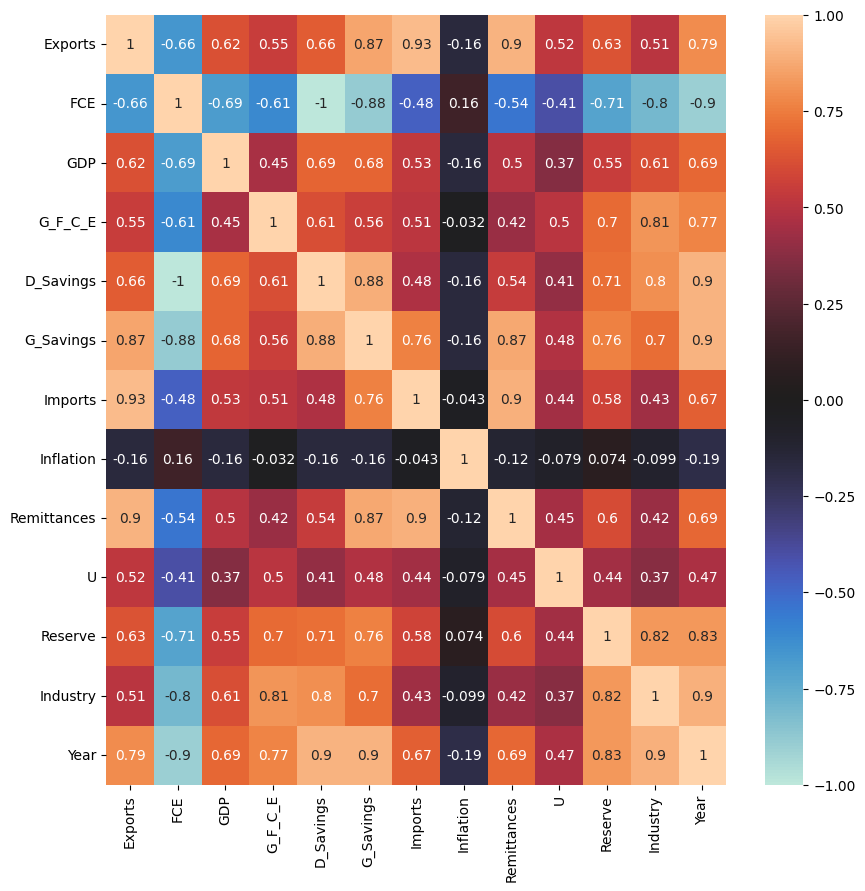

In [12]:
#Heatmap
plt.figure(figsize=(10,10))
           
                
annot=True
hemap=sns.heatmap(cor,vmin=-1,vmax=1,center=0,annot=annot)
hemap

In [117]:
df.to_csv("cleanned_data11.csv")

### Multicolinearity checking of the data frame


In [ ]:
# from patsy import dmatrices
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# #Desgin matrix

# y, X = dmatrices("GDP~Exports+FCE+G_F_C_E+D_Savings+G_Savings+Imports+Inflation+Remittances+U+Reserve+FDII+FDIO+Industry", data=df, return_type='dataframe')

# #create DataFrame to hold VIF values
# vif_df = pd.DataFrame()
# vif_df['variable'] = X.columns 

# #calculate VIF for each predictor variable 
# vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# #view VIF for each predictor variable 
# print(vif_df)
  

### Multiple linear regression model 

In [13]:
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt
import numpy as np

In [14]:
df.shape
list(df.columns)

['Exports',
 'FCE',
 'GDP',
 'G_F_C_E',
 'D_Savings',
 'G_Savings',
 'Imports',
 'Inflation',
 'Remittances',
 'U',
 'Reserve',
 'Industry',
 'Year']

<Axes: xlabel='FCE', ylabel='GDP'>

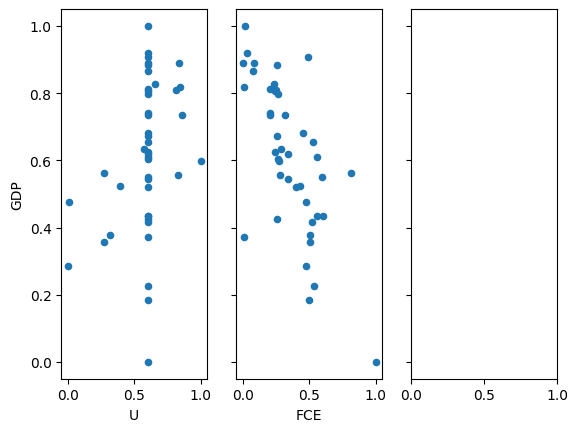

In [15]:
fig,axe=plt.subplots(1,3,sharey=True)#scatter plot 
df.plot(kind="scatter",x="U",y="GDP",ax=axe[0])
df.plot(kind='scatter',x='FCE',y='GDP',ax=axe[1])

C:\Users\Uaer\AppData\Local\Temp\ipykernel_6464\3959204969.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,3,15)


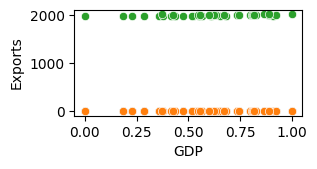

In [16]:
#Scatter plot using the for loop 
count=0
plt.subplots(figsize=(10, 8))
for i in df.columns:
    plt.subplot(5,3,15)
    sns.scatterplot(data=df,x="GDP",y=i)
    count+=1

plt.show()
    

In [ ]:
#Scatter plot using the for loop 
# x_col="GDP"
# y_columns=['Exports','FCE','G_F_C_E','D_Savings','G_Savings','Imports',
#  'Inflation','Remittances','U','Reserve','FDII','FDIO','Industry']

# for y_col in y_columns:
#     figure=plt.figure
#     ax=plt.gca()
#     ax.scatter(df[x_col],df[y_col])
#     ax.set_xlabel(x_col)
#     ax.set_ylabel(y_col)
#     ax.set_title("{} vs {}".format(x_col, y_col))
# count=1
# plt.subplots(figsize=(10, 8))
# for i in df.columns:
#     plt.subplot(3,2,count)
#     sns.scatterplot(df["GDP"],df[i])
#     count+=1

# plt.show()
    

### Multiple linear regression model 

In [ ]:
# fig,ax=plt.subplots(2,4,sharey=True)#scatter plot 
# ax[0,0].scatter(x=df["U"],y=df["GDP"])


"""
ax[i,j].scatter(x=df[i], y=df["GDP "])
"""

In [ ]:
# featur_cols=['Exports',"FCE","G_F_C_E","D_Savings","G_Savings","Imports","Inflation","Remittances",
#              "U","Reserve","FDII","FDIO","Industry"]
# x=df[featur_cols]
# y=df.GDP


# from sklearn import model_selection 
# from sklearn.linear_model import LinearRegression
# xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.3,random_state=42)





### Download clean data from worksheet 

In [ ]:
#df.to_csv("cleanned_data3.csv")

In [ ]:
from sklearn import model_selection 
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)
print(lm.intercept_)
print(lm.coef_)


### predict four year GDP 

In [ ]:
df_new=pd.DataFrame({"GDP":[2023,2024,2025,2026]})
df_new

In [ ]:
# lm.predict(df_new)
predicts=lm.predict(xtest)
predicts


In [ ]:
print(sqrt(mean_squared_error(ytest,predicts)))

In [ ]:
import statsmodels.formula.api as smf
lm=smf.ols(formula="GDP~Exports+FCE+G_F_C_E+D_Savings+G_Savings+Imports+Inflation+Remittances+U+Reserve+FDII+FDIO+Industry",data=df).fit()
lm.conf_int()
lm.summary()


In [ ]:
lm=smf.ols(formula="GDP~Industry+Reserve",data=df).fit()
lm.rsquared

### Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge,Lasso

In [ ]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=0.001)

ridgeReg.fit(xtrain,ytrain)
print(sqrt(mean_squared_error(ytrain, ridgeReg.predict(xtrain))))
print(sqrt(mean_squared_error(ytest, ridgeReg.predict(xtest))))
print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(xtest, ytest)))

### LASSO REGRESSION

In [ ]:
# from sklearn.linear_model import Lasso
# from sklearn.model_selection import RepeatedKFold
# lassoreg = Lasso(alpha=.01)
# Lasso.fit(xtrain,ytrain)
# print(sqrt(mean_squared_error(ytrain, Lasso.predict(xtrain))))
# print(sqrt(mean_squared_error(ytest, Lasso.predict(xtest))))
# print('R2 Value/Coefficient of Determination: {}'.format(Lasso.score(xtest, ytest)))

In [ ]:
df.head()

# Support vector regression

In [ ]:
from sklearn.svm import SVR
model_svr=SVR(kernel="rbf")
model_svr.fit(xtrain,ytrain)


In [ ]:
model_svr.score(xtest,ytest)

In [ ]:
y_pred=model_svr.predict(xtest)
r2_score(ytest,y_pred)

# Dataframe Merge
Neaz

In [ ]:
df.head()

In [ ]:
x1.shape,df.shape

In [ ]:
df2 = pd.concat([df,x1],axis=1)

In [ ]:
df2.head()

In [ ]:
df2.shape

In [ ]:
X = df.drop("GDP",axis=1)
y = df.GDP

In [ ]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [ ]:
# X_train,X_test = X[:30],X[30:]
# y_train,y_test = y[:30],y[30:]

In [ ]:
X_train.shape,y_train.shape

In [ ]:
from sklearn.svm import SVR
model_svr=SVR(kernel="rbf")
model_svr.fit(X_train,y_train)



In [ ]:
model_svr.score(X_test,y_test)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
y_pred=model_svr.predict(X_test)
print(y_pred[:4])
r2_score(y_test,y_pred)